In [1]:
using DelimitedFiles
using Plots
using LaTeXStrings

geomean(x) = exp(sum(log.(x))/length(x))
 
# convert A[k,:] = (newtstep, gmresstep, gmresresidual)
# to B[gmresstep, newtstep] = gmresresidual
function rearrange(A)
    m = Int(maximum(A[:,2])) + 1
    n = Int(maximum(A[:,1])) + 1
    
    B = zeros(m,n)
    for k = 1:size(A,1)
        B[Int(A[k,2])+1, Int(A[k,1])+1] = A[k,3]
    end
    B
end

function meanconvergence(B)  
    meanconv = zeros(size(B,1))
    for k in 1:size(B,1)
        Bk = B[k,1]
        meanconv[k] = B[k,1] # geomean(Bk .+ 1e-16)
    end
    meanconv
end

meanconvergence(filename::String) = meanconvergence(rearrange(readdlm(filename)))

meanconvergence (generic function with 2 methods)

In [54]:
; cd ../results-EQ2-48x49x48-randpert

/home/gibson/research/channelgroups/convergence-plot/results-EQ2-48x49x48-randpert


In [2]:
A = rearrange(readdlm("nosymm-convergence.asc"))
B = rearrange(readdlm("sxytz-convergence.asc"))
C = rearrange(readdlm("sztx-convergence.asc"))
D = rearrange(readdlm("sxytz-sztx-convergence.asc"));

In [69]:
A

47×4 Matrix{Float64}:
 0.629488     0.99966      0.840994     0.891456
 0.627238     0.753288     0.823787     0.877588
 0.525021     0.568336     0.809333     0.720524
 0.524388     0.563827     0.782589     0.674114
 0.505606     0.563606     0.672467     0.649148
 0.504836     0.559171     0.621288     0.630005
 0.488549     0.553075     0.615911     0.512549
 0.447952     0.552874     0.615741     0.442364
 0.44795      0.528635     0.573384     0.44141
 0.394376     0.334892     0.51194      0.436378
 0.3671       0.252267     0.457241     0.436052
 0.348177     0.214402     0.402503     0.432232
 0.322367     0.211667     0.318346     0.426688
 ⋮                                      
 0.00410148   0.000286158  0.000148473  0.000615155
 0.00275644   0.000152769  5.86573e-5   0.000265244
 0.00154069   9.10983e-5   0.0          0.000122846
 0.00117684   0.0          0.0          9.81909e-5
 0.0010083    0.0          0.0          0.0
 0.000792699  0.0          0.0          0.0
 0.000

In [70]:
B

28×4 Matrix{Float64}:
 0.49989      0.999282     0.619345     0.849972
 0.499885     0.770995     0.598309     0.766178
 0.378362     0.484666     0.42968      0.554256
 0.315932     0.398261     0.325683     0.409986
 0.307428     0.328856     0.283704     0.248416
 0.306261     0.328852     0.238178     0.231217
 0.301788     0.328429     0.199554     0.229415
 0.298851     0.324108     0.173272     0.147422
 0.296563     0.308407     0.0702177    0.106882
 0.293156     0.307912     0.0361979    0.0669541
 0.292719     0.306265     0.0138799    0.0341301
 0.281008     0.280737     0.0103958    0.0289422
 0.252474     0.274233     0.00967647   0.0250914
 ⋮                                      
 0.00605056   0.0148651    0.00595542   0.0146184
 0.00185624   0.00471891   0.00226094   0.00516157
 0.00140598   0.00166175   0.000540028  0.00188871
 0.00115901   0.000863565  0.000142125  0.000547625
 0.00102395   0.000273697  4.88406e-5   0.000141115
 0.000954024  0.000150305  0.0          

In [71]:
C

26×3 Matrix{Float64}:
 0.7238       0.990048     0.994036
 0.712042     0.66828      0.972621
 0.553451     0.457356     0.930237
 0.537794     0.387246     0.930157
 0.533052     0.3274       0.907695
 0.513622     0.314834     0.894096
 0.401302     0.255952     0.846517
 0.37932      0.240977     0.846482
 0.311235     0.220497     0.827237
 0.287329     0.148694     0.685496
 0.237271     0.116333     0.654651
 0.20273      0.109425     0.591021
 0.133577     0.0728669    0.516611
 0.114618     0.0727863    0.326809
 0.036108     0.0512908    0.13069
 0.0142448    0.0246225    0.0745116
 0.00981832   0.0143791    0.0438472
 0.00438219   0.00713337   0.0208119
 0.00224644   0.00280105   0.0128552
 0.00139582   0.0012539    0.00625593
 0.00109553   0.000605238  0.00298644
 0.00103128   0.000233972  0.00107326
 0.00101826   9.41705e-5   0.00033516
 0.000590327  0.0          6.0076e-5
 0.000197854  0.0          0.0
 6.7672e-5    0.0          0.0

In [72]:
D

15×3 Matrix{Float64}:
 0.554999     0.988782     0.984131
 0.552348     0.728425     0.981235
 0.258065     0.50024      0.556406
 0.143525     0.392807     0.463749
 0.14276      0.337093     0.463731
 0.134221     0.336825     0.345484
 0.102614     0.28041      0.277506
 0.0991893    0.181429     0.220213
 0.0345303    0.0782945    0.0764136
 0.00721379   0.0206115    0.0358671
 0.00293672   0.0132338    0.00902532
 0.000552057  0.0033417    0.00264204
 0.000175766  0.000474846  0.000868091
 4.19939e-5   0.000143798  0.000130003
 0.0          2.65774e-5   2.93989e-5

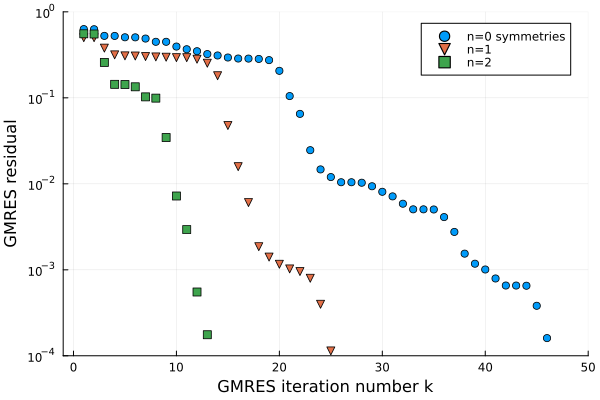

In [45]:
#title!("\$\\alpha\$")


scatter(A[:,1], marker=:circ, label="n=0 symmetries")
scatter!(B[:,1], marker=:downtri, label="n=1")
scatter!(D[:,1], marker=:square, label="n=2")

#scatter!(C[:,1], marker=:downtri, label="one symmetry")
#scatter!(D[:,1], marker=:square, label="two symmetries")
#scatter!(0:length(conv3)-1, conv3, label="sxy-sz-txz")
#plot!(yaxis=:log, ylim=(1e-4, 1), xlim=(-1,20.5))
plot!(yaxis=:log, ylim=(1e-4, 1), xlim=(-1,50))
plot!(legendfontsize=8)
plot!(xlabel="GMRES iteration number k", ylabel="GMRES residual")
#k = 0:20
#a = 0.35
#plot!(k, exp.(-a*k), color=:blue)
#plot!(k, exp.(-2a*k), color=:red)
#plot!(k, exp.(-4a*k), color=:green)

In [46]:
savefig("gmres-convergence.pdf")

"/home/gibson/research/channelgroups/convergence-plot/results-EQ2-48x49x48-randpert/gmres-convergence.pdf"

In [65]:
conv0  = meanconvergence("nosymm-convergence.asc")
conv1  = meanconvergence("sxytz-convergence.asc")
conv2  = meanconvergence("sztx-convergence.asc")
conv3  = meanconvergence("sxytz-sztx-convergence.asc")

15-element Vector{Float64}:
 0.554999
 0.552348
 0.258065
 0.143525
 0.14276
 0.134221
 0.102614
 0.0991893
 0.0345303
 0.00721379
 0.00293672
 0.000552057
 0.000175766
 4.19939e-5
 0.0

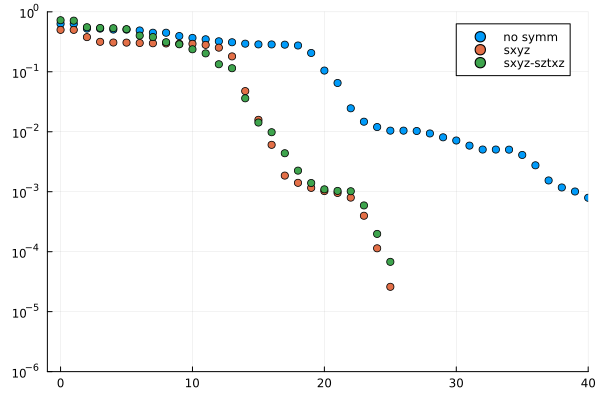

In [66]:
scatter(0:length(conv0)-1, conv0, label="no symm")
scatter!(0:length(conv1)-1, conv1, label="sxyz")
scatter!(0:length(conv2)-1, conv2, label="sxyz-sztxz")
#scatter!(0:length(conv3)-1, conv3, label="sxy-sz-txz")
#plot!(yaxis=:log, ylim=(1e-4, 1), xlim=(-1,20.5))
plot!(yaxis=:log, ylim=(1e-6, 1), xlim=(-1,40))
#k = 0:20
#a = 0.35
#plot!(k, exp.(-a*k), color=:blue)
#plot!(k, exp.(-2a*k), color=:red)
#plot!(k, exp.(-4a*k), color=:green)

In [5]:
;ls

makeplot.ipynb
nosymm-convergence.asc
sxyz-convergence.asc
sxyz-txz-convergence.asc
